# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [316]:
import MeCab
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

In [23]:
!wget https://nlp100.github.io/data/neko.txt

--2021-04-22 11:50:01--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.06s   

2021-04-22 11:50:01 (15.9 MB/s) - ‘neko.txt’ saved [975789/975789]



In [226]:
! mecab neko.txt -o neko.txt.mecab

In [227]:
! cat neko.txt.mecab | head -n 10

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
cat: stdout: Broken pipe


## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [222]:
# tagger = MeCab.Tagger()

# with open('neko.txt','r') as neko:
#   text = neko.read()
  
# with open("neko.txt.mecab",'w') as neko_mecab:
#   neko_mecab.write(tagger.parse(text))
  
# !head -n 5 neko.txt.mecab

一	イチ	イチ	一	名詞-数詞			2
　			　	空白			
吾輩	ワガハイ	ワガハイ	我が輩	代名詞			0
は	ワ	ハ	は	助詞-係助詞			
猫	ネコ	ネコ	猫	名詞-普通名詞-一般			1


In [331]:
with open("neko.txt.mecab",'r') as neko_pos:
  text_pos = neko_pos.readlines()
  
text_pos[:10]

['一\t名詞,数,*,*,*,*,一,イチ,イチ\n',
 '\n',
 '\t記号,一般,*,*,*,*,*\n',
 'EOS\n',
 '\n',
 '\t記号,一般,*,*,*,*,*\n',
 'EOS\n',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\n',
 '吾輩\t名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ\n',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n']

In [397]:
POSList = []

text_pos.remove('\n')
text_pos.remove('EOS\n')
text_pos.remove('\t記号,一般,*,*,*,*,*\n')

for line in text_pos:
  line_splitted = re.split('\t|,',line)
  if '記号' not in line_splitted[1:] and len(line_splitted) > 2:
    POSList.append({"surface":line_splitted[0],
                       "base":line_splitted[7], 
                       "pos":line_splitted[1],
                       "pos1":line_splitted[2]})
    
POSList[:10]

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}]

## 31. 動詞

動詞の表層形をすべて抽出せよ

In [398]:
verbs = [x['surface'] for x in POSList if x['pos']=='動詞']
verbs[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

## 32. 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [279]:
verbs_std = [x['base'] for x in POSList if x['pos']=='動詞']
verbs_std[:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [395]:
nounphrase = [POSList[x-1]['surface'] + 'の' + POSList[x+1]['surface'] 
              for x in range(len(POSList)) 
              if (POSList[x]['surface'] == 'の')
             and (POSList[x-1]['pos'] == '名詞')
             and (POSList[x+1]['pos'] == '名詞')]

nounphrase[:10]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [396]:
maxnoun = 1
nouncount = 0
nounphrase = ''
for i in range(len(POSList)):
  if i == 0:
    if POSList[i]['pos'] == '名詞':
      nouncount += 1
  else:
    if POSList[i]['pos'] == '名詞':
      nouncount += 1
      if nouncount > maxnoun:
        maxcount = nouncount
        nounphrase = ''.join([POSList[x]['surface'] for x in range(i-maxcount+1, i+1)])
    else:
      nouncount = 0

nounphrase

'南無阿弥陀仏南無阿弥陀仏'

## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [294]:
count = {}

for word in POSList:
  if word['base'] not in count.keys():
    count[word['base']] = 0
  count[word['base']] += 1

count_sorted = {}
for word in sorted(count, key=count.get, reverse=True):
  count_sorted[word] = count[word]

list(count_sorted.items())[:10]

[('の', 9194),
 ('て', 6848),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657)]

## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

dict_keys(['の', 'て', 'は', 'に', 'を', 'だ', 'と', 'が', 'た', 'する'])
dict_values([9194, 6848, 6420, 6243, 6071, 5972, 5508, 5337, 4267, 3657])


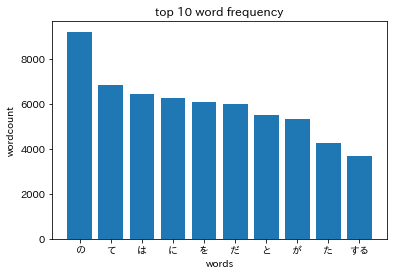

In [367]:
top10 = dict(list(count_sorted.items())[:10])
words = top10.keys()
wordcount = top10.values() 
print(words)
print(wordcount)
plt.bar(words, wordcount)
plt.title('top 10 word frequency')
plt.xlabel('words')
plt.ylabel('wordcount')
plt.show()

## 37. 「猫」と共起頻度の高い上位10語

猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [342]:
with open("neko.txt.mecab",'r') as neko_pos:
  text_pos2 = neko_pos.read()

In [364]:
sentences = []
for sentence in text_pos2.split('EOS'):
  sentences.append(sentence.split('\n'))

neko_cooccur = {}
for sentence in sentences:
  sentence_base = []
  for line in sentence:
    line_splitted = re.split('\t|,',line)
    if '記号' not in line_splitted[1:] and len(line_splitted) > 2:
        sentence_base.append(line_splitted[7])
  if '猫' in sentence_base:
    sentence_base.remove('猫')
    for word in sentence_base:
      neko_cooccur[word] = neko_cooccur[word] + 1 if word in neko_cooccur.keys() else 1

neko_cooccur_sorted = {}
for word in sorted(neko_cooccur, key=neko_cooccur.get, reverse=True):
  neko_cooccur_sorted[word] = neko_cooccur[word]

list(neko_cooccur_sorted.items())[:10]

[('の', 391),
 ('は', 272),
 ('に', 250),
 ('を', 232),
 ('だ', 231),
 ('て', 229),
 ('と', 202),
 ('が', 180),
 ('する', 144),
 ('た', 140)]

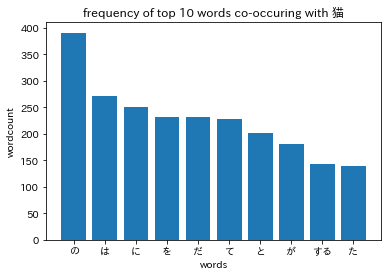

In [368]:
neko_cooccur_top10 = dict(list(neko_cooccur_sorted.items())[:10])
x, y = neko_cooccur_top10.keys(), neko_cooccur_top10.values()
plt.bar(x,y)
plt.title('frequency of top 10 words co-occuring with 猫')
plt.xlabel('words')
plt.ylabel('wordcount')
plt.show()

## 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

<function matplotlib.pyplot.show(close=None, block=None)>

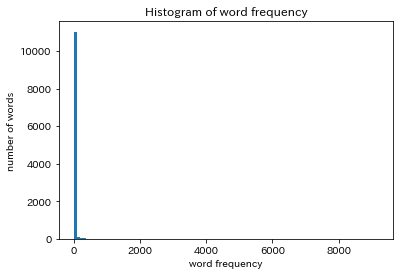

In [386]:
x = count_sorted.values()
plt.hist(x, bins=100)
plt.title('Histogram of word frequency')
plt.xlabel('word frequency')
plt.ylabel('number of words')
plt.show

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

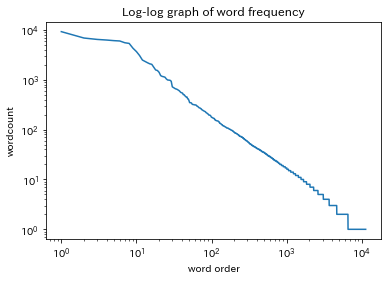

In [393]:
x = range(1,len(count_sorted.keys())+1)
y = count_sorted.values()
plt.loglog(x,y)
plt.title("Log-log graph of word frequency")
plt.xlabel('word order')
plt.ylabel('wordcount')
plt.show()